# Breast Cancer Prediction
## Gaussian Naive Bayes Classifier
---
In this notebook, I will be using the Breast Cancer Data Set to predict whether the patient has cancer or not. I will be using Gaussian Naive Bayes Classifier to predict the outcome.

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
dataset = pd.read_csv('../Data/breast_cancer/BreastCancer.csv')

In [60]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [62]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

All the features in the dataset are integers and the target variable is a binary variable. The dataset is already clean and does not have any missing values.

But the first column (Sample code number) is not useful for the prediction, so I will drop it.

In [63]:
dataset = dataset.drop(dataset.columns[0], axis=1)

In [64]:
# extracting features and target
y = dataset["Class"]
X = dataset.drop(columns="Class", axis=1)

In [65]:
# z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
# min-max normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Now that preprocessing is done, I will split the data into training, validation, and test sets. I will use the training set to train the model and the validation set to tune the hyperparameters. Finally, I will evaluate the model on the test set.

In [67]:
# Split into train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% for temp

In [68]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% for validation and test

## Model Training

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(X_train, y_train)

GaussianNB()

In [71]:
y_val_pred = gnb.predict(X_val)
y_test_pred = gnb.predict(X_test)

## Cross-Validation

In [72]:
cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)
print(f"Average of 5-Fold CV Score: {cv_scores.mean():.2f}")

Average of 5-Fold CV Score: 0.96


## Evaluating the Model

In [73]:
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [74]:
print(f"Validation accuracy: {val_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Validation accuracy: 0.95
Test accuracy: 0.98


As the accuracy scores show, the model is not overfitting the training data and is generalizing well to the validation and test data. The model is able to predict whether a patient has cancer or not with an accuracy of **95%** on the test data.

### Confusion Matrix

In [75]:
test_matrix = confusion_matrix(y_test, y_test_pred)

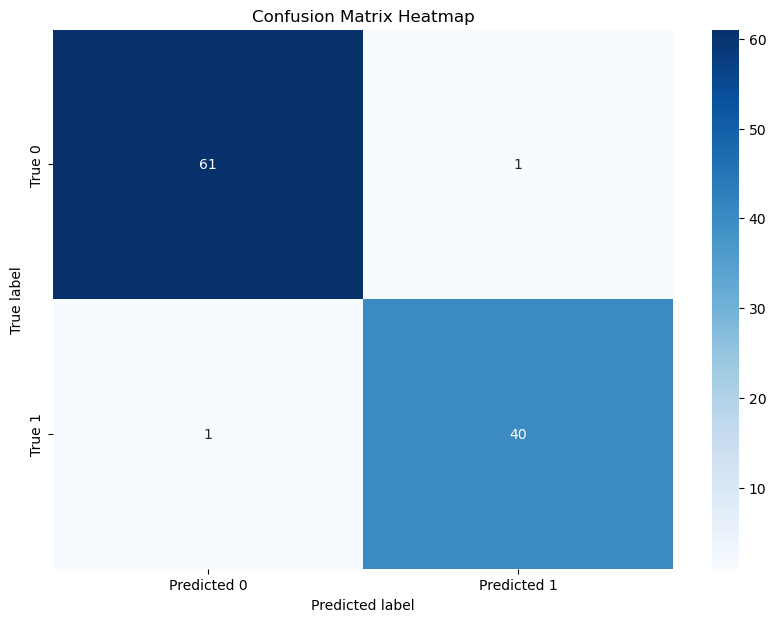

In [76]:
plt.figure(figsize=(10, 7))
sns.heatmap(test_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()